# Predicting Online Shopper Intent
#### NEURAL NETWORK IMPLEMENTATION
##### Implemented by Jeremia Adriano

In [1]:
import numpy as np
from IPython.display import display,HTML
from numpy import *

### Importing some useful packages
#This ensures that plots appear in the sheet and not in a new window
%matplotlib inline 

#Pandas is an alternative numerical processing library like numpy: they have differences
#We will use Pandas only to provide a preview of the data once we've read it in
import pandas as pd

np.set_printoptions(suppress=True)

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


### Background

This project involves predicting something that is somewhat of a “holy grail” of business intelligence: trying to predict whether or not a customer will eventually make a purchase using while using an online shopping portal, based on the pattern of pages they have visited on the website, certain analytical features, the time of week and year, and other features. 

The data file we’ve been given is a selection of a much larger data set: it consists of 3816 data examples and 17 features; the output variable is the last (18th) column of the file labelled “Revenue” and represents whether or not a customer eventually made a purchase (0 – purchase made  / 1 – purchase not made).

### What are Neural Networks?


A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria. 

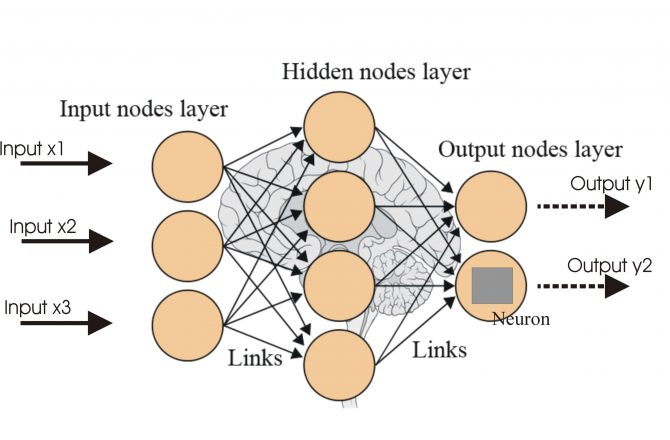

A neural network works similarly to the human brain’s neural network. A ```neuron``` in a neural network is a mathematical function that collects and classifies information according to a specific architecture. 

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a ```multi-layered perceptron (MLP)```, perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. For instance, the patterns  for this project comprise a list of quantities for online purchasing indicators for a online website; potential outputs are either "__purchase made__" or "__purchase not made__"

### Reading in the Data

We will begin with Importting our Training data whcih will be used to train our SVM, and perform predictions on the developed SVM using the Cross-Vaidation data set. 

In [2]:
data = loadtxt('data/train.dat')
column_labels = ['','# Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser Region', 'TrafficType', 'VisitorType', 'Weekend','Revenue']
CV = loadtxt('data/cv.dat')
display(pd.DataFrame(data,columns = column_labels).head(10))


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,2.0,162.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,4.0,2.0,0.0,0.0
1,2.0,256.0,0.0,0.0,10.0,117.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,7.0,11.0,2.0,1.0,1.0
2,0.0,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0,0.0,10.0,2.0,5.0,1.0,1.0,2.0,0.0,0.0
3,8.0,131.0,1.0,4.0,95.0,2107.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0
4,2.0,8.0,1.0,14.0,14.0,603.0,0.0,0.0,44.0,0.0,3.0,2.0,2.0,1.0,7.0,2.0,0.0,1.0
5,1.0,18.0,0.0,0.0,62.0,1288.0,0.0,0.0,13.0,0.0,11.0,2.0,10.0,1.0,3.0,2.0,0.0,1.0
6,4.0,81.0,0.0,0.0,12.0,223.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0,0.0
7,16.0,485.0,2.0,19.0,42.0,753.0,0.0,0.0,31.0,0.0,11.0,2.0,2.0,1.0,8.0,2.0,0.0,1.0
8,5.0,1417.0,0.0,0.0,36.0,1051.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,2.0,1.0,0.0
9,3.0,371.0,5.0,106.0,85.0,2128.0,0.0,0.0,43.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0


### Reshape the Training data: 

In [3]:
#Divide the training data into X and y which represents the features and the results respectively.
X = data[:,:17]
y = data[:,17]


print("\nFeatures of the Training data:")
display(pd.DataFrame(X,columns = column_labels[:17]).head(10))

print("\nTarget variable of the Training data:")
display(pd.DataFrame(y, columns =column_labels[17:]).head(10))



Features of the Training data:


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,2.0,162.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,4.0,2.0,0.0
1,2.0,256.0,0.0,0.0,10.0,117.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,7.0,11.0,2.0,1.0
2,0.0,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0,0.0,10.0,2.0,5.0,1.0,1.0,2.0,0.0
3,8.0,131.0,1.0,4.0,95.0,2107.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0
4,2.0,8.0,1.0,14.0,14.0,603.0,0.0,0.0,44.0,0.0,3.0,2.0,2.0,1.0,7.0,2.0,0.0
5,1.0,18.0,0.0,0.0,62.0,1288.0,0.0,0.0,13.0,0.0,11.0,2.0,10.0,1.0,3.0,2.0,0.0
6,4.0,81.0,0.0,0.0,12.0,223.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0
7,16.0,485.0,2.0,19.0,42.0,753.0,0.0,0.0,31.0,0.0,11.0,2.0,2.0,1.0,8.0,2.0,0.0
8,5.0,1417.0,0.0,0.0,36.0,1051.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,2.0,1.0
9,3.0,371.0,5.0,106.0,85.0,2128.0,0.0,0.0,43.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0



Target variable of the Training data:


,Revenue
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,0.0
7,1.0
8,0.0
9,1.0


### Reshape the cross-validation data: 

In [4]:
#Divide the cv data into tX and ty which represents the features and the results respectively.
tX = CV[:,:17]
ty = CV[:,17]

print("Features of the CV data:")
display(pd.DataFrame(X,columns = column_labels[:17]).head(10))

print("\nTarget variable of the CV data:")
display(pd.DataFrame(y, columns =column_labels[17:]).head(10))


Features of the CV data:


,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,2.0,162.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,1.0,4.0,2.0,0.0
1,2.0,256.0,0.0,0.0,10.0,117.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,7.0,11.0,2.0,1.0
2,0.0,0.0,0.0,0.0,6.0,31.0,0.0,0.0,0.0,0.0,10.0,2.0,5.0,1.0,1.0,2.0,0.0
3,8.0,131.0,1.0,4.0,95.0,2107.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,4.0,2.0,1.0
4,2.0,8.0,1.0,14.0,14.0,603.0,0.0,0.0,44.0,0.0,3.0,2.0,2.0,1.0,7.0,2.0,0.0
5,1.0,18.0,0.0,0.0,62.0,1288.0,0.0,0.0,13.0,0.0,11.0,2.0,10.0,1.0,3.0,2.0,0.0
6,4.0,81.0,0.0,0.0,12.0,223.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0
7,16.0,485.0,2.0,19.0,42.0,753.0,0.0,0.0,31.0,0.0,11.0,2.0,2.0,1.0,8.0,2.0,0.0
8,5.0,1417.0,0.0,0.0,36.0,1051.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,2.0,1.0
9,3.0,371.0,5.0,106.0,85.0,2128.0,0.0,0.0,43.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0



Target variable of the CV data:


,Revenue
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,0.0
7,1.0
8,0.0
9,1.0


### Feature Scaling 

The datasets contain features that are highly varying in magnitudes, units and range. And since most Machine Learning algorithms use Eucledian Distance between two data points in their computations, this becomes a problem.

These algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, e.g 5kg and 5000gms. The features with higher magnitudes will weigh in a lot more in the distance calculations compared to features with low magnitudes.

To suppress this effect, we need to reduce all features to the same level of magnitudes. This can be achieved by __scaling__ and in this case, StandardScaler was used.

### How is the  StandardScaler achieved 

The standard score of a sample x is calculated as:

```z = (x - u) / s```

   > where ```u``` is the __mean__ of the training samples or zero if __with_mean=False__

   > ```s``` is the __standard deviation__ of the training samples or one if __with_std=False__.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
scaler.fit(tX)
X = scaler.transform(X)
tX = scaler.transform(tX)

display(pd.DataFrame(X,columns = column_labels[:17]).head(10))

,,# Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser Region,TrafficType,VisitorType,Weekend
0,-0.749823,-0.450407,-0.446930,-0.282114,-0.776913,-0.702782,0.0,0.0,-0.491103,-0.081218,-0.925537,-0.146352,0.829910,-0.884824,-0.009182,0.483385,-0.589963
1,-0.162134,0.766023,-0.446930,-0.282114,-0.606088,-0.726171,0.0,0.0,-0.491103,-0.081218,0.885194,-0.146352,-0.235223,1.562744,1.742327,0.483385,1.695021
2,-0.749823,-0.450407,-0.446930,-0.282114,-0.691500,-0.770871,0.0,0.0,-0.491103,-0.081218,0.583405,-0.146352,1.362476,-0.884824,-0.759829,0.483385,-0.589963
3,1.600931,0.172063,0.253291,-0.260865,1.208929,0.308156,0.0,0.0,-0.491103,-0.081218,-0.925537,-0.146352,-0.235223,0.338960,-0.009182,0.483385,1.695021
4,-0.162134,-0.412394,0.253291,-0.207744,-0.520675,-0.473567,0.0,0.0,0.906127,-0.081218,-1.529114,-0.146352,-0.235223,-0.884824,0.741465,0.483385,-0.589963
5,-0.455978,-0.364877,-0.446930,-0.282114,0.504276,-0.117530,0.0,0.0,-0.078285,-0.081218,0.885194,-0.146352,4.025307,-0.884824,-0.259398,0.483385,-0.589963
6,0.425554,-0.065521,-0.446930,-0.282114,-0.563382,-0.671076,0.0,0.0,-0.491103,-0.081218,-1.529114,-1.220072,-0.767789,-0.884824,-0.259398,0.483385,-0.589963
7,3.951684,1.854158,0.953511,-0.181183,0.077213,-0.395602,0.0,0.0,0.493309,-0.081218,0.885194,-0.146352,-0.235223,-0.884824,0.991680,0.483385,-0.589963
8,0.719398,6.282725,-0.446930,-0.282114,-0.050906,-0.240713,0.0,0.0,-0.491103,-0.081218,-1.529114,-0.146352,-0.235223,0.746888,-0.509613,0.483385,1.695021
9,0.131710,1.312467,3.054173,0.280972,0.995398,0.319071,0.0,0.0,0.874372,-0.081218,0.885194,-1.220072,-0.767789,-0.884824,-0.509613,0.483385,-0.589963


### Creating the Neural Network Classifiers

SciKit Learn has a neural_network library that can be used to train our data. In this case we will import the object estimator called the ```Multi-Layer Perceptron Classifier``` model.

Note that ```Perceptron``` is a linear classifier (binary) and that it is used in ```supervised learning```, as it helps classify a given input data.

In [6]:
from sklearn.neural_network import MLPClassifier

Below I have initialized 5 different Neural Networks all with a different number of ```hidden nodes``` in their (one and only) Hidden Layer ranging from 3 - 15 nodes.

##### activation function:
The activation function used by the MLPClassifier is the Rectified Linear function also known as ReLu and is mathematically defined as ```y = max(0,x)```

##### optimization algorithms:
There were two optimization algorithms I tested, namely being ```Adam``` and ```SGB```.

**Adam** is an algorithm for gradient-based optimization of stochastic objective functions. It combines the advantages of two SGB extentions - Root Mean Square Propagation and Adaptive Gradient Algorithm - and computes individual adaptive learning rates for different parameters.

**SGB**  is a variant of Gradient descent, _"being a technique that updates each parameter of a model and, observe how the change would affect the objective function, choose a direction that would lower the error rate, continue iterating until the objective function converges to the minimum."_ However instead of performing computations on the whole dataset - which is redundant and ineffiecient - SGB only computes on a small subset or random selection of data examples.

As my research indicated, Adam proved to generalize poorly compared to SGD, as it failed to converge to an optimal solution under certain conditions such as a low learning and limiting the number of iterations to 500 and less. 

In [7]:
def createNN(num, learn, itr):
    instances = []
    for i in range(len(num)):
        mlp = MLPClassifier(hidden_layer_sizes = (num[i]),solver='sgd', max_iter = itr, learning_rate_init = learn[i])
        instances.append(mlp)
    return instances

NNs = createNN([3,6,9,12,15],[0.1,0.5,0.25,0.125,0.0625],500) #Parameters can be altered 

I then trained the 5 Neural Networks using training data I've scaled along with the built-in function ```fit(features,accurate_value)```. 

In [8]:

iresults = []
for i in NNs:
    m = (i.fit(X,y))
    print("\n"+ str(m))
    
    iresults.append(m)
 



MLPClassifier(hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=500,
              solver='sgd')

MLPClassifier(hidden_layer_sizes=6, learning_rate_init=0.5, max_iter=500,
              solver='sgd')

MLPClassifier(hidden_layer_sizes=9, learning_rate_init=0.25, max_iter=500,
              solver='sgd')

MLPClassifier(hidden_layer_sizes=12, learning_rate_init=0.125, max_iter=500,
              solver='sgd')

MLPClassifier(hidden_layer_sizes=15, learning_rate_init=0.0625, max_iter=500,
              solver='sgd')


## <font color = black> Comparing of Learning rates and Hidden Nodes: </font>

We can make use of the Loss function to measure the inconsistency between our predicted values and actual values for each number of nodes in the hidden layer when training our data for the number of iterations. I have also plot the graph of Loss function vs Number of iterations, and the graphs converge towards 0 Loss as the number of iterations tend to infinity.

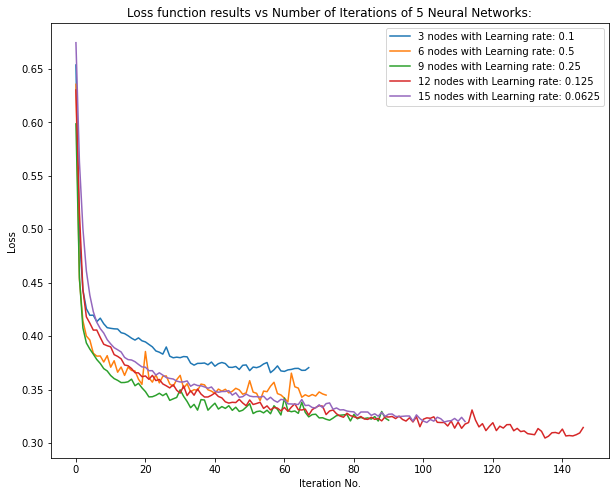

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

figure(figsize=(10,8))
for x in iresults:
        plt.plot(x.loss_curve_,label = str(x.hidden_layer_sizes) + " nodes with Learning rate: " + str(x.learning_rate_init))
        
xlabel('Iteration No.')
ylabel('Loss')
legend(loc=1)
plt.title('Loss function results vs Number of Iterations of 5 Neural Networks:')
    
plt.show()

Thus to confirm the best hyperparameters (Learning rate and size of Hidden layer), I made use of the built-in function called GridSearch which compares predefined parameters by training on data using the defined parameters and returns the best parameters to define a desired model.

In [10]:
from sklearn.model_selection import GridSearchCV

mlp2 = MLPClassifier(max_iter = 500)
parameters = {'hidden_layer_sizes':[3,6,9,12,15],'learning_rate_init':[0.1,0.5,0.25,0.125,0.0625], 'solver': ['sgd']}
grid = GridSearchCV(mlp2,parameters,n_jobs = -1)
grid.fit(X,y)

print('Based off GridSearch the most favorable hyperparameters would be ', grid.best_params_)

Based off GridSearch the most favorable hyperparameters would be  {'hidden_layer_sizes': 3, 'learning_rate_init': 0.0625, 'solver': 'sgd'}


### OBTAINING THE CONFUSION MATRIX AND VISUALISING IT 

Now we will import our CV data and predict on it and compare the results for the 5 varying Neural Networks. 

Note the Confusion Matrix is printed in the format [[TN,FP],[FN,TP]]

If Negative is 1 and Positive is 0 then:

    True Negative: Represent a number of datasets that were actually = 0 and the Neural Network predicted = 0
    False Postive: Represent a number of datasets that were actually = 0 and the Neural Network predicted = 1
    False Negative: Represent a number of datasets that were actually = 1 and the Neural Network predicted = 0
    True Positive: Represent a number of datasets that were actually = 1 and the Neural Network predicted = 1


In [11]:
#Graph defined to draw the respective Confusion Matrices
def draw_graph(cm,ttl,acc): 
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title("\n\n"+ttl + str(round(acc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

Further definitions and the analysis of the confusion matrix of the chosen model will be found in the Testing notebook. Below I have printed a copy of the confusion matrices of the 5 classifiers. 


These are the Confusion Matrices for the Respective Neural Networks.



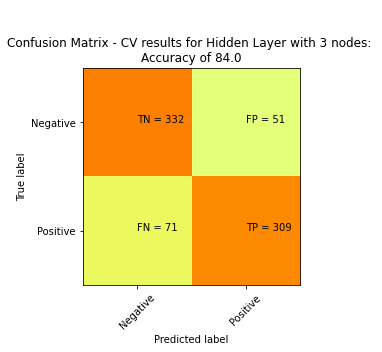


Below is the classification report for the Neural Network listed above: 
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       383
         1.0       0.86      0.81      0.84       380

    accuracy                           0.84       763
   macro avg       0.84      0.84      0.84       763
weighted avg       0.84      0.84      0.84       763



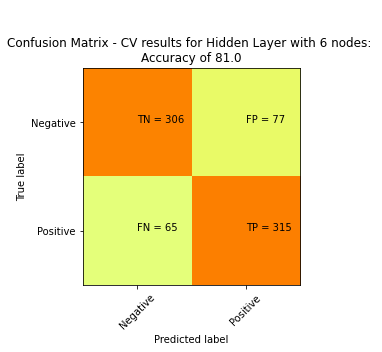


Below is the classification report for the Neural Network listed above: 
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       383
         1.0       0.80      0.83      0.82       380

    accuracy                           0.81       763
   macro avg       0.81      0.81      0.81       763
weighted avg       0.81      0.81      0.81       763



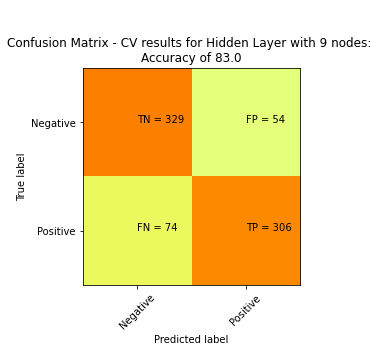


Below is the classification report for the Neural Network listed above: 
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       383
         1.0       0.85      0.81      0.83       380

    accuracy                           0.83       763
   macro avg       0.83      0.83      0.83       763
weighted avg       0.83      0.83      0.83       763



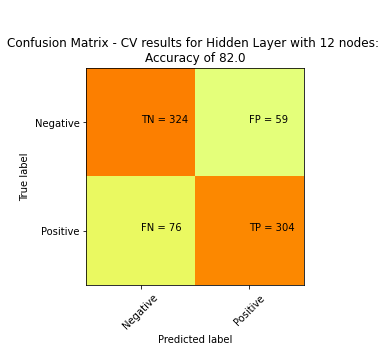


Below is the classification report for the Neural Network listed above: 
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       383
         1.0       0.84      0.80      0.82       380

    accuracy                           0.82       763
   macro avg       0.82      0.82      0.82       763
weighted avg       0.82      0.82      0.82       763



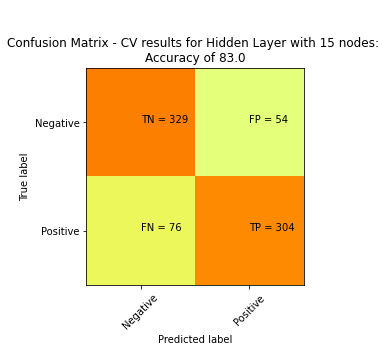


Below is the classification report for the Neural Network listed above: 
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84       383
         1.0       0.85      0.80      0.82       380

    accuracy                           0.83       763
   macro avg       0.83      0.83      0.83       763
weighted avg       0.83      0.83      0.83       763



In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

i = 0
accuracy = []
precision = []
recall = []
f1 = []
predictions1 = []
predict_prob = []
print("\nThese are the Confusion Matrices for the Respective Neural Networks.\n")

for x in iresults:
    predictions = x.predict(tX)
    pred = x.predict_proba(tX)
    cm = confusion_matrix(ty,predictions)
    cm1 = classification_report(ty,predictions)
    score = accuracy_score(ty,predictions)
    prec = precision_score(ty,predictions)
    rec = recall_score(ty,predictions)
    f1s = f1_score(ty,predictions)
    precision.append(round(prec)*100)
    recall.append(round(rec)*100)
    f1.append(round(f1s)*100)
    accuracy.append(round(score*100))
    ttl = 'Confusion Matrix - CV results for Hidden Layer with ' + str(x.hidden_layer_sizes) + ' nodes: \nAccuracy of '
    
    predictions1.append(predictions)
    predict_prob.append(pred)
    draw_graph(cm,ttl,score*100)
    
    print("\nBelow is the classification report for the Neural Network listed above: \n" + cm1)
    
plt.show()  

## Comparing CV Accuracies and selecting the most promising Neural Network model:

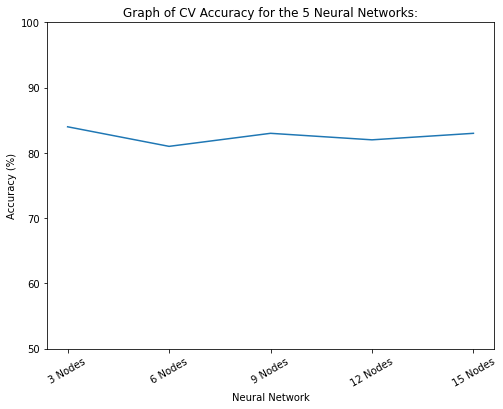

The chosen model is the model with the highest CV accuracy, in this case the chosen model is the model 
with 3 hidden nodes, with a  CV accuracy of 84.0%


In [13]:
from matplotlib import pyplot

figure(figsize=(8,6))
plt.ylim([50,100])
labels = ['3 Nodes','6 Nodes','9 Nodes','12 Nodes','15 Nodes']
index = np.arange(len(labels))
plt.plot(index,accuracy)

plt.title('Graph of CV Accuracy for the 5 Neural Networks:')
plt.xticks(index,labels, rotation = 30)
plt.xlabel('Neural Network')
plt.ylabel('Accuracy (%)')
plt.show()

maxAcc = np.amax(accuracy)
ind1 = np.where(accuracy == np.amax(accuracy))
ind =ind1[0]
ind = int(ind[0])

print("The chosen model is the model with the highest CV accuracy, in this case the chosen model is the model \nwith " + str((iresults[ind]).hidden_layer_sizes) +" hidden nodes, with a  CV accuracy of " + str(maxAcc) + "%")

### Visualising The results

In [14]:
import sklearn.metrics as sklm


def getMetricsSKL(ytrue,ypred):
    acc = 0
    rec = 0
    prec = 0
    f1 = 0
    
    #FILL IN HERE: Set all of the variables above correctly
    acc = sklm.accuracy_score(ytrue, ypred)
    rec = sklm.recall_score(ytrue, ypred)
    prec = sklm.precision_score(ytrue, ypred)
    f1 = sklm.f1_score(ytrue, ypred)
    #STOP FILLING IN HERE
    
    return acc,rec,prec,f1


accskl,recskl,precskl,f1skl = getMetricsSKL(ty,predictions1[ind])
NNresult = [accskl*100,recskl*100,precskl*100,f1skl*100]

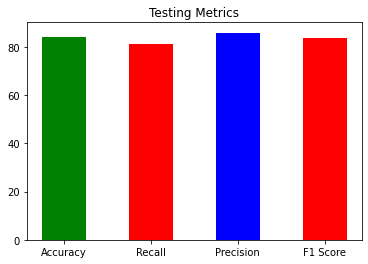


From the graph above we can see that:

 	 	Neural Network has an Accuracy of 84.0%

 	 	Neural Network has an recall of 81.0%

 	 	Neural Network has an Precision  of 86.0%

 	 	Neural Network has an f1-score of 84.0%


In [15]:
titles = "Accuracy","Recall", "Precision", "F1 Score"
temp = [NNresult[0],NNresult[1],NNresult[2],NNresult[3]]

plt.title("Testing Metrics")
plt.bar(titles[0], temp[0], color ='g', width = 0.5)
plt.bar(titles[1], temp[1], color ='r', width = 0.5)
plt.bar(titles[2], temp[2], color ='b', width = 0.5)
plt.bar(titles[3], temp[3], color ='r', width = 0.5)

plt.show()

print("\nFrom the graph above we can see that:")
print("\n \t \tNeural Network has an Accuracy of " + str(round(temp[0])) +"%")
print("\n \t \tNeural Network has an recall of " + str(round(temp[1])) +"%")
print("\n \t \tNeural Network has an Precision  of " + str(round(temp[2])) +"%")
print("\n \t \tNeural Network has an f1-score of " + str(round(temp[3])) +"%")



### Save the model:

In [16]:
import pickle

# Save to file in the current working directory
pkl_filename = "model/nn_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(NNs[ind], file)


### Biblography:


- "An Introduction to Support Vector Machines (SVM)", _Bruno Stecanella_, 22 June 2017,[Accesssed online 10 May 2019]
https://www.analyticsvidhya.com/blog/2016/08/evolution-core-concepts-deep-learning-neural-networks/


- "Tuning parameters for logistic regression", _joparga3_ , 2006, [Accesssed online 12 May 2019]
https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression


- Various SKLearn modules were obtained from https://scikit-learn.org